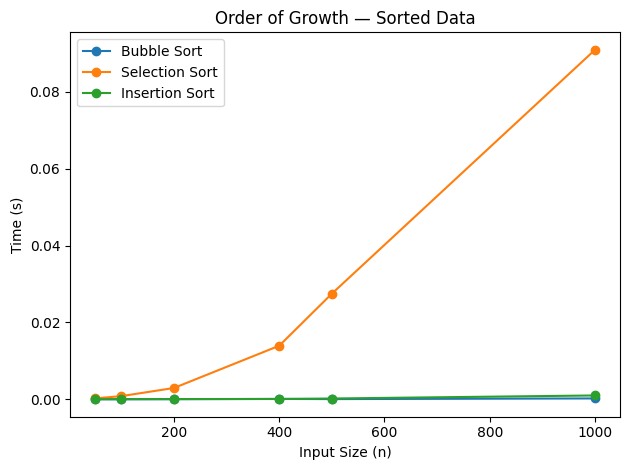

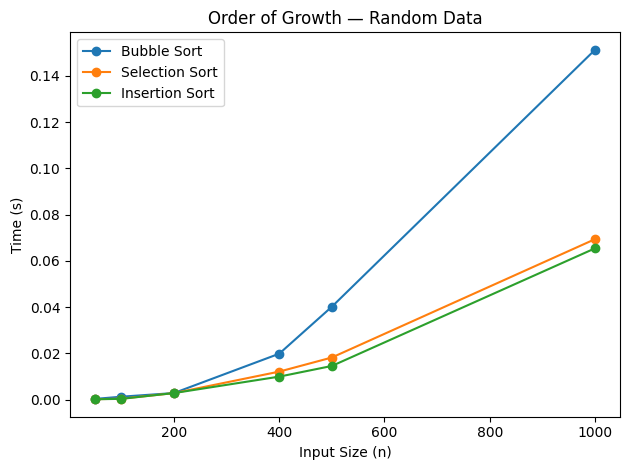

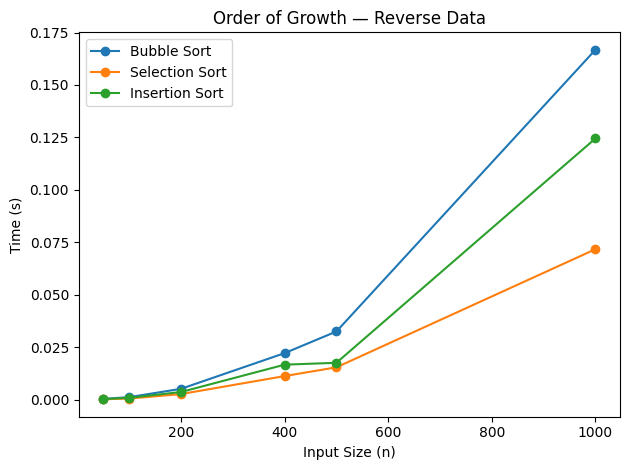

   scenario       algorithm     n   seconds
0    sorted     Bubble Sort    50  0.000024
1    sorted  Selection Sort    50  0.000247
2    sorted  Insertion Sort    50  0.000027
3    sorted     Bubble Sort   100  0.000025
4    sorted  Selection Sort   100  0.000838
5    sorted  Insertion Sort   100  0.000037
6    sorted     Bubble Sort   200  0.000039
7    sorted  Selection Sort   200  0.002955
8    sorted  Insertion Sort   200  0.000073
9    sorted     Bubble Sort   400  0.000113
10   sorted  Selection Sort   400  0.013946
11   sorted  Insertion Sort   400  0.000094
12   sorted     Bubble Sort   500  0.000066
13   sorted  Selection Sort   500  0.027486
14   sorted  Insertion Sort   500  0.000216
15   sorted     Bubble Sort  1000  0.000236
16   sorted  Selection Sort  1000  0.090927
17   sorted  Insertion Sort  1000  0.001010
18   random     Bubble Sort    50  0.000256
19   random  Selection Sort    50  0.000130
20   random  Insertion Sort    50  0.000110
21   random     Bubble Sort   10

In [19]:
"""
HW1 — Problem 4
By: Darling Ngoh

Goal: Create three visualizations of order-of-growth (runtime vs input size)
for three sorting algorithms (Bubble, Selection, Insertion) under three
input scenarios: sorted, random, and reverse-sorted.

Input sizes tested: 50, 100, 200, 400, 500, 1000.
Each plot shows time vs n for all three algorithms.
"""
import time               # high-resolution timing
import random             # deterministic RNG for reproducible random inputs
import matplotlib.pyplot as plt
import pandas as pd

# Use a seeded RNG so random inputs are reproducible between runs
RNG = random.Random(42)

# Sizes to benchmark; kept moderate because these are O(n^2) sorts
SIZES = [50, 100, 200, 400, 500, 1000]

def make_input(n, scenario, rng=RNG):
    """Return an input list of size n according to scenario.

    scenario:
      - "sorted": ascending 0..n-1
      - "reverse": descending n..1
      - "random": random integers in [0, 10000]
    """
    if scenario == "sorted":
        return list(range(n))
    elif scenario == "reverse":
        # descending sequence
        return list(range(n, 0, -1))
    elif scenario == "random":
        # use provided RNG for reproducibility
        return [rng.randint(0, 10_000) for _ in range(n)]
    else:
        raise ValueError("Unknown scenario")

def time_algorithm(func, arr):
    """Time func(arr) using a copy of arr and return elapsed seconds.

    We copy the input so the caller's array is not mutated between trials.
    """
    a = list(arr)  # copy to avoid in-place side effects across runs
    start = time.perf_counter()
    func(a)
    return time.perf_counter() - start

def bubble_sort(arr):
    """Optimized bubble sort with early exit when already sorted."""
    n = len(arr)
    for i in range(n - 1):
        swapped = False
        # Each pass bubbles the largest remaining element to the end
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            # array is already sorted — exit early
            break

def selection_sort(arr):
    """Selection sort: repeatedly select the minimum remaining element."""
    n = len(arr)
    for i in range(n - 1):
        min_idx = i
        # find index of minimum element in the remainder
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        if min_idx != i:
            # swap into position i
            arr[i], arr[min_idx] = arr[min_idx], arr[i]

def insertion_sort(arr):
    """Insertion sort: build sorted prefix by inserting next element."""
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        # shift larger elements to the right to make space for key
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Mapping for readable algorithm names used in plots and dataframes
ALGS = {
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort,
    "Insertion Sort": insertion_sort,
}

def benchmark_scenario(scenario):
    """Run all algorithms on all sizes for one scenario and return a DataFrame.

    Columns: scenario, algorithm, n, seconds
    """
    rows = []
    for n in SIZES:
        base = make_input(n, scenario)
        for name, fn in ALGS.items():
            # time a single run; could be repeated and averaged if needed
            t = time_algorithm(fn, base)
            rows.append({"scenario": scenario, "algorithm": name, "n": n, "seconds": t})
    return pd.DataFrame(rows)

def plot_scenario(df, scenario, filename=None):
    """Plot time vs n for all algorithms for a given scenario.

    If filename is provided, save the figure to disk.
    """
    sub = df[df["scenario"] == scenario]
    plt.figure()

    # Explicit plotting order and colors so legend appears exactly as requested.
    colors = {
        "Bubble Sort": "tab:blue",     # blue
        "Selection Sort": "tab:orange",# orange
        "Insertion Sort": "tab:green", # green
    }
    plot_order = ["Bubble Sort", "Selection Sort", "Insertion Sort"]

    # Plot in the specified order (this controls the legend order).
    for name in plot_order:
        group = sub[sub["algorithm"] == name]
        if group.empty:
            continue
        g = group.sort_values("n")
        plt.plot(g["n"], g["seconds"], marker='o', label=name, color=colors[name])

    title = f"Order of Growth — {scenario.capitalize()} Data"
    plt.title(title)
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time (s)")
    plt.legend()
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=150)
    plt.show()

# Run benchmarks for each scenario and collect results
df_sorted = benchmark_scenario("sorted")
df_random = benchmark_scenario("random")
df_reverse = benchmark_scenario("reverse")

# Concatenate for easier plotting across scenarios
df_all = pd.concat([df_sorted, df_random, df_reverse], ignore_index=True)

# Produce the three requested plots
plot_scenario(df_all, "sorted")
plot_scenario(df_all, "random")
plot_scenario(df_all, "reverse")

# Show the collected data
print(df_all)